# PROBLEM 0

> Create a script that generates random data from different distributions. Mainly, compare:
> - A normal or Gaussian distribution for different values of the variance and mean
> - A uniformly random distribution
> - The beta distribution
> 

## Preliminaries

Let's start by importing all the libraries that we will need:

In [ ]:
# When we want to use a library, we need to import it first, as shown below. The 'library_handle' is the name that we'll use to call the functions of that library, to make our lives easier. We can choose whatever we want.
#   > import library_name as library_handle

# WARNING: if you run into some errors, try installing the libraries that we are importing inside your python environtment first using the following command inside a terminal (with your desired python evironment activated)
#   > pip install library_name

# Useful links:
#   - Numpy's documentation: https://numpy.org/doc/2.3/
#   - Scipy's documentation: https://docs.scipy.org/doc//scipy/index.html
#   - Matplotlib's documentation: https://matplotlib.org/stable/index.html
#   - Python's documentation (v.3.13.9): https://docs.python.org/3.13/

import numpy as np
import scipy as sp
import matplotlib as mpl
import pandas as pd

Also, let's check that all of those packages were correctly installed:

In [17]:
print(f"Numpy's version: {np.__version__}")
print(f"Matplot's version: {mpl.__version__}")
print(f"Scipy's version: {sp.__version__}")
print(f"Pandas's version: {pd.__version__}")

Numpy's version: 2.3.4
Matplot's version: 3.10.7
Scipy's version: 1.16.3
Pandas's version: 2.3.3


## Gaussian distribution

Now that we have our environment ready to go, let's start by generating a Gaussian or normal distribution for different values of the variance, $\sigma$, and mean, $\mu$.

In [ ]:
# With
#   > def function_name(default_values):
# we can define a Python function. Thanks to this definition, we can simply call it afterwards without needing to re-code it every time we want to change some parameters (variance and mean in this exemple).

# Default values: mean = 0, std = 1.

def plot_normal_pdf_cdf(mu=0, sigma=1):
    x = np.linspace(-10, 10, 1000) # We generate a vector from -10 to 10 with 1000 points
    x_pdf = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
    x_cdf = np.cumsum(x_pdf) / (len(x) / (np.max(x) - np.min(x))) # normalization
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, x_pdf, label='PDF')
    ax.plot(x, x_cdf, label='CDF')
    ax.grid()
    ax.legend()
    ax.set_xlabel('x')
    ax.set_title('PDF and CDF of Normal Distribution')

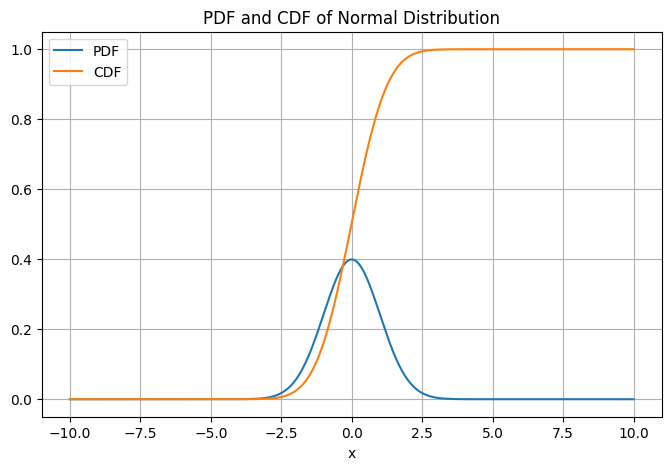

In [22]:

plot_normal_pdf_cdf(mu=0, sigma=1)